In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
dataset = pd.read_csv('data/Dataset.csv')

In [3]:
dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df = dataset.join(pd.get_dummies(dataset['type'], dtype=int))
df = df.drop(columns=['nameOrig', 'nameDest', 'isFlaggedFraud', 'type'])

for col in ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']:
    scaler = StandardScaler()
    scaler.fit(df[[col]])
    df[col] = scaler.transform(df[[col]])

df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,-0.281560,-0.229810,-0.237622,-0.323814,-0.333411,0,0,0,0,1,0
1,1,-0.294767,-0.281359,-0.285812,-0.323814,-0.333411,0,0,0,0,1,0
2,1,-0.297555,-0.288654,-0.292442,-0.323814,-0.333411,1,0,0,0,0,1
3,1,-0.297555,-0.288654,-0.292442,-0.317582,-0.333411,1,0,1,0,0,0
4,1,-0.278532,-0.274329,-0.282221,-0.323814,-0.333411,0,0,0,0,1,0


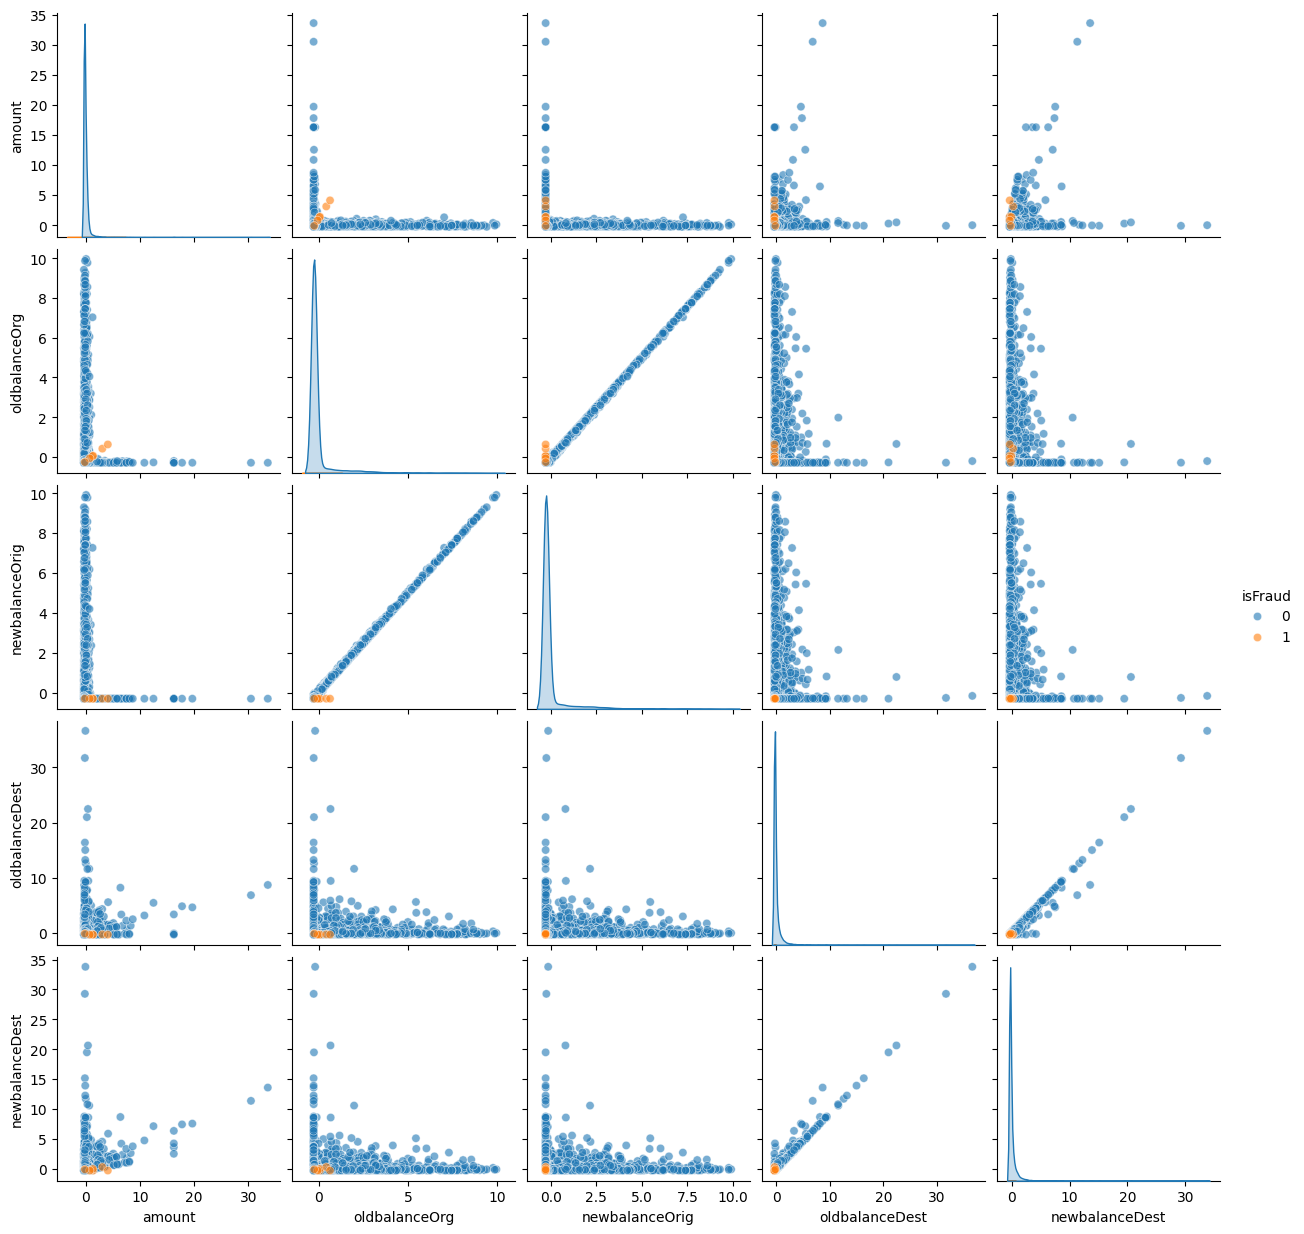

In [5]:
sns.pairplot(
    df.sample(10000).sort_values(by='isFraud'),  # sort so isFraud==1 comes last
    vars=['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'],
    hue='isFraud',
    plot_kws={'alpha': 0.6}  # make non-fraud slightly transparent if needed
)

In [6]:
df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].corr()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000


<Axes: xlabel='type', ylabel='count'>

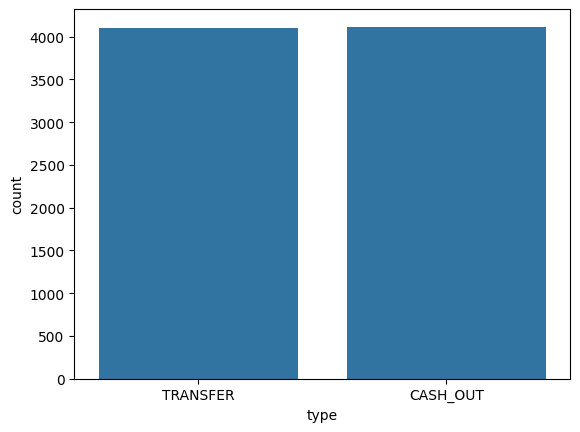

In [5]:
sns.countplot(dataset[dataset['isFraud'] == 1], x='type')

Text(0.5, 0, 'New Source Account Balance ($)')

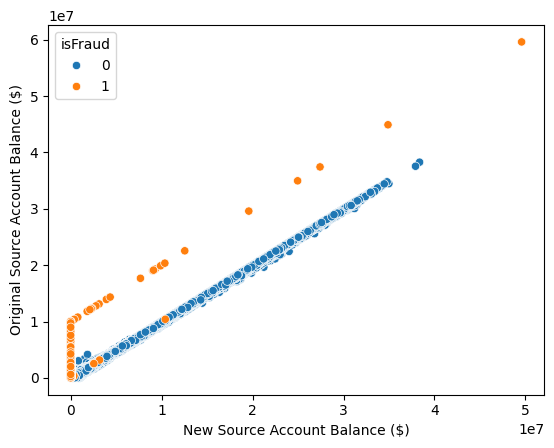

In [48]:
import matplotlib.pyplot as plt

ax = sns.scatterplot(
    dataset.sample(1000000).sort_values(by='isFraud'),  # sort so isFraud==1 comes last
    x='newbalanceOrig', y='oldbalanceOrg',
    hue='isFraud',
)
plt.ylabel('Original Source Account Balance ($)')
plt.xlabel('New Source Account Balance ($)')

Text(0, 0.5, 'Amount ($)')

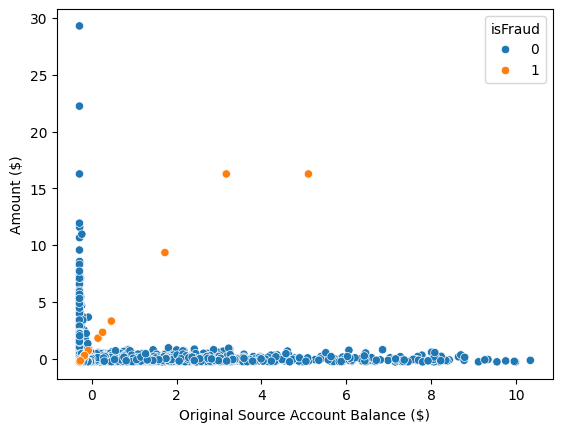

In [16]:
import matplotlib.pyplot as plt
# sns.scatterplot(data=dataset.sample(10000), x='oldbalanceOrg', y='amount', hue='isFraud')
ax = sns.scatterplot(
    df.sample(10000).sort_values(by='isFraud'),  # sort so isFraud==1 comes last
    x='oldbalanceOrg', y='amount',
    hue='isFraud',
)
plt.xlabel('Original Source Account Balance ($)')
plt.ylabel('Amount ($)')

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['isFraud']), df['isFraud'], test_size=0.2)

In [12]:
import math
from sklearn.neighbors import KNeighborsClassifier


k = round(math.sqrt(df.shape[0]))

kNN = KNeighborsClassifier(n_neighbors=k, p=3, metric='euclidean', n_jobs=-1)
kNN.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_jobs=-1, n_neighbors=2522, p=3)

In [13]:
batch_size = 10000  # Adjust this based on your memory capacity
y_pred = []
for i in range(0, len(X_test), batch_size):
    print(f"{(i + 1) / len(X_test) * 100:.2f}%")
    batch = X_test[i:i + batch_size]
    y_pred.append(kNN.predict(batch))
y_pred = np.concatenate(y_pred, axis=0)

0.00%
0.79%
1.57%
2.36%
3.14%
3.93%
4.72%
5.50%
6.29%
7.07%
7.86%
8.64%
9.43%
10.22%
11.00%
11.79%
12.57%
13.36%
14.15%
14.93%
15.72%
16.50%
17.29%
18.07%
18.86%
19.65%
20.43%
21.22%
22.00%
22.79%
23.58%
24.36%
25.15%
25.93%
26.72%
27.50%
28.29%
29.08%
29.86%
30.65%
31.43%
32.22%
33.01%
33.79%
34.58%
35.36%
36.15%
36.93%
37.72%
38.51%
39.29%
40.08%
40.86%
41.65%
42.44%
43.22%
44.01%
44.79%
45.58%
46.36%
47.15%
47.94%
48.72%
49.51%
50.29%
51.08%
51.87%
52.65%
53.44%
54.22%
55.01%
55.79%
56.58%
57.37%
58.15%
58.94%
59.72%
60.51%
61.30%
62.08%
62.87%
63.65%
64.44%
65.22%
66.01%
66.80%
67.58%
68.37%
69.15%
69.94%
70.73%
71.51%
72.30%
73.08%
73.87%
74.65%
75.44%
76.23%
77.01%
77.80%
78.58%
79.37%
80.16%
80.94%
81.73%
82.51%
83.30%
84.08%
84.87%
85.66%
86.44%
87.23%
88.01%
88.80%
89.59%
90.37%
91.16%
91.94%
92.73%
93.52%
94.30%
95.09%
95.87%
96.66%
97.44%
98.23%
99.02%
99.80%


In [16]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270849
           1       0.00      0.00      0.00      1675

    accuracy                           1.00   1272524
   macro avg       0.50      0.50      0.50   1272524
weighted avg       1.00      1.00      1.00   1272524

[[1270849       0]
 [   1675       0]]


c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [20]:
n_total_estimators = 200
batch_size = 10

clf = RandomForestClassifier(n_estimators=0, warm_start=True, max_depth=20, n_jobs=-1)

for i in range(0, n_total_estimators, batch_size):
    clf.n_estimators += batch_size
    clf.fit(X_train, y_train)
    print(f"Trained {clf.n_estimators}/{n_total_estimators} trees")


Trained 10/200 trees
Trained 20/200 trees
Trained 30/200 trees
Trained 40/200 trees
Trained 50/200 trees
Trained 60/200 trees
Trained 70/200 trees
Trained 80/200 trees
Trained 90/200 trees
Trained 100/200 trees
Trained 110/200 trees
Trained 120/200 trees
Trained 130/200 trees
Trained 140/200 trees
Trained 150/200 trees
Trained 160/200 trees
Trained 170/200 trees
Trained 180/200 trees
Trained 190/200 trees
Trained 200/200 trees


In [21]:
y_pred = clf.predict(X_test)

In [22]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1270832      17]
 [    403    1272]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270849
           1       0.99      0.76      0.86      1675

    accuracy                           1.00   1272524
   macro avg       0.99      0.88      0.93   1272524
weighted avg       1.00      1.00      1.00   1272524



In [23]:
n_total_estimators = 50
batch_size = 10

clf = RandomForestClassifier(n_estimators=0, warm_start=True, max_depth=20, n_jobs=-1)

for i in range(0, n_total_estimators, batch_size):
    clf.n_estimators += batch_size
    clf.fit(X_train, y_train)
    print(f"Trained {clf.n_estimators}/{n_total_estimators} trees")


Trained 10/50 trees
Trained 20/50 trees
Trained 30/50 trees
Trained 40/50 trees
Trained 50/50 trees


In [24]:
y_pred = clf.predict(X_test)

In [25]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1270834      15]
 [    402    1273]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270849
           1       0.99      0.76      0.86      1675

    accuracy                           1.00   1272524
   macro avg       0.99      0.88      0.93   1272524
weighted avg       1.00      1.00      1.00   1272524



In [26]:
n_total_estimators = 50
batch_size = 10

clf = RandomForestClassifier(n_estimators=0, warm_start=True, max_depth=10, n_jobs=-1)

for i in range(0, n_total_estimators, batch_size):
    clf.n_estimators += batch_size
    clf.fit(X_train, y_train)
    print(f"Trained {clf.n_estimators}/{n_total_estimators} trees")
    
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Trained 10/50 trees
Trained 20/50 trees
Trained 30/50 trees
Trained 40/50 trees
Trained 50/50 trees
[[1270842       7]
 [    494    1181]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270849
           1       0.99      0.71      0.83      1675

    accuracy                           1.00   1272524
   macro avg       1.00      0.85      0.91   1272524
weighted avg       1.00      1.00      1.00   1272524

